# Explanation For Vectorized Implementation

---


 $Z^{[1]} = W^{[1]}X + b^{[1]}$ <br>
 $A^{[1]} = σ(Z^{[1]})$ <br>
 $Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$ <br>
 $A^{[2]} = σ(Z^{[2]})$ <br><br>

앞서 신경망의 propagation을 위와같은 식으로 Vectorization하였다. <br>
이 등식이 왜 여러 훈련 샘플에 대한 정확한 Vectorization인지 살펴볼수있다. <br><br>

$ex)$ <br>

예를들어 첫 훈련 샘플에 대해 $z^{[1](1)} = w^{[1]}x^{(1)}+b^{[1]}$ 을 계산하고 <br>
두번째 훈련 샘플에 대해  $z^{[1](2)} = w^{[1]}x^{(2)}+b^{[1]}$ 을 계산하고 <br>
세번째 훈련 샘플에 대해  $z^{[1](3)} = w^{[1]}x^{(3)}+b^{[1]}$ 을 계산한다고하자. <br><br>

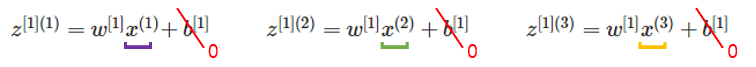

설명을 간단히 하기위해 $b$는 0으로 무시하도록 한다. <br>
$w^{[1]}$ 은 어떤 한 행렬이고 훈련샘플 $x^{(1)}$와 곱 연산이 되면 이것은 열 벡터가 된다. <br><br>
$w^{[1]}$  : $\begin{bmatrix}----\\----\\----\\---- \end{bmatrix}$ $\qquad$ $w^{[1]}$ <font color=purple> $x^{(1)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font> <br>
이렇게 그릴 수 있다. <br><br>

$x^{(2)}$ 도 비슷하게 $w^{[1]}$ 에 곱하면 열 벡터가 나온다. <br><
$w^{[1]}$ <font color=purple> $x^{(1)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font> $\qquad$ $w^{[1]}$ <font color=green> $x^{(2)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font> <br><br>

마지막으로 $x^{(3)}$ 도 $w^{[1]}$ 를 곱하면 $z^{[1](3)}$인 열 벡터가 된다. <br>

$w^{[1]}$ <font color=purple> $x^{(1)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font> $\qquad$ $w^{[1]}$ <font color=green> $x^{(2)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font> $\qquad$ $w^{[1]}$ <font color=orange> $x^{(3)}$ = $\begin{bmatrix}·\\·\\·\\· \end{bmatrix}$ </font><br><br>

훈련 샘플을 모두 쌓아 만든 훈련세트 $X$를 살펴보면 <br>
$x^{(1)}$,$x^{(2)}$,$x^{(3)}$을 모두 가로로 쌓아 만든것을 알수있다. <br><br>



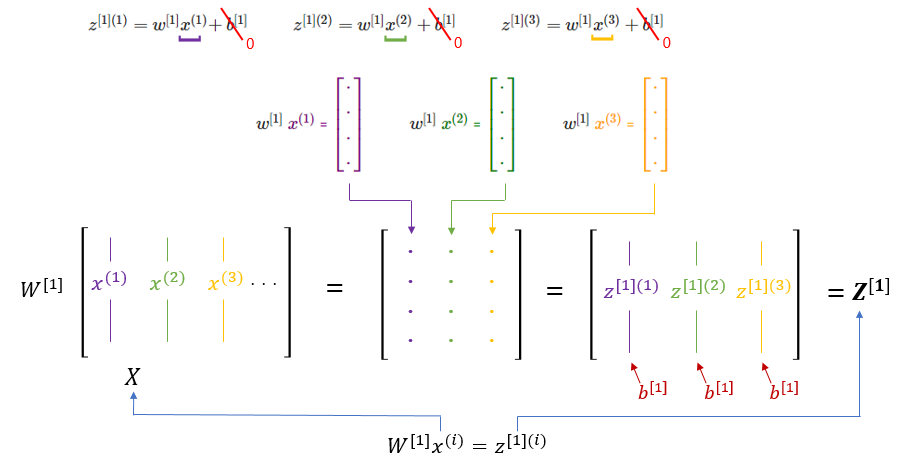

이 행렬 $X$와 $W^{[1]}$를 곱한다면 첫 열은 보라색과 같게되고 <br>
둘째 열은 초록색, 셋째 열은 주황색 열과 같다. <br>
이 값은 $z^{[1](1)}$, $z^{[1](2)}$, $z^{[1](3)}$을 열 벡터로 표기한것과 같다. <br> 훈련 샘플이 많아진다면 열이 더 많아질 것이다. <br><br>
이렇게 $w^{[1]}x^{(i)} = z^{[1](i)}$와 같이 훈련샘플들을 각 열에 채운다면 $z$가 열로 쌓인 $Z$가 나온다. <br>
파이썬 브로드캐스팅을 통해 $b$값을 더해준다면 더욱 정확한 값이 나올것이다. <br>
따라서 첫번째 등식인 $Z^{[1]} = W^{[1]}X + b^{[1]}$을 확인할 수 있다. <br>
입력값을 열로 쌓는다면 결과도 열로 쌓인 값이 나오게된다. <br>
비슷한 분석방법으로 다른 등식들도 구할 수 있다. <br><br>



---




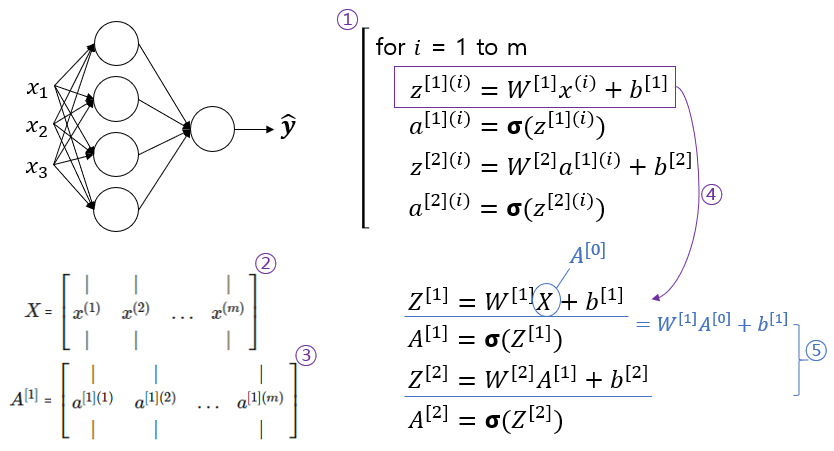

정리해보자면 하나의 훈련샘플에 대해 propagation을 한다면 <br>
<font color=purple>①</font>번 처럼 i가 1부터 m까지인 코드를 실행해야한다. <br>
이것을 <font color=purple>②</font>번과 <font color=purple>③</font>번 처럼 훈련샘플을 열로 쌓아서 Vectorization 해준다. <br>
$A^{[1]}$만 보이지만 나머지 값들도 같은 방법으로해준다. <br>
이렇게 <font color=purple>④</font>번 처럼 모든 m개의 훈련샘플에 대해 Vectorization할 수 있다. <br>
<br>
여기서 잘 보면 $X$는 $A^{[0]}$과 같다. <br>
input 피쳐 벡터 $x$는 $a^{[0]}$과 같기 때문이다. <br>
즉 $x^{(i)}$는 $a^{[0][i]}$와 같다. <br>
그렇다면 이 식에서는 대칭성을 찾아볼수있다. <br>
<font color=royalblue>⑤</font>번에서 보는것과 같이 <br>
$Z^{[1]} = W^{[1]}A^{[0]} + b^{[1]}$ <br>
$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$ <br>
이 공식들은 지수만 1 증가했을뿐 대략 같은 것을 계산하고있다는것을 보여준다. <br>
따라서 여기서는 2층 신경망을 다뤘지만 <br>
앞으로 더 깊은 신경망을 구성해도 이것을 반복한다는것을 알수있다. <br>
이렇게 다수의 훈련 샘플에 대해 신경망을 Vectorization 하는 방법을 알아보았다. <br>
<br>

---

참조 : https://youtu.be/kkWRbIb42Ms